In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt

In [12]:
ecg = pd.read_csv('../data/practice/underwork/5/calm_p.csv')

df = ecg.set_index('Time').sort_index()
df['MA_window_1'] = df['1'].rolling(window=100).mean()
df

,1,2,3,4,5,6,MA_window_1
Time,,,,,,,
10.000,1.313532,-0.367128,-0.293800,1.946667,1.873333,-0.330268,NaN
10.001,1.312748,-0.369088,-0.294584,1.947843,1.873333,-0.331836,NaN
10.002,1.312356,-0.370657,-0.294976,1.948627,1.872941,-0.332621,NaN
10.003,1.311179,-0.372618,-0.294976,1.949804,1.872157,-0.333797,NaN
10.004,1.310787,-0.374578,-0.295761,1.950980,1.872157,-0.334973,NaN
...,...,...,...,...,...,...,...
59.995,1.357450,-0.084404,-0.099697,1.822745,1.838039,-0.091854,1.334162
59.996,1.357450,-0.083227,-0.098912,1.822353,1.838039,-0.091070,1.334456
59.997,1.357058,-0.082443,-0.097344,1.822353,1.837255,-0.089893,1.334758


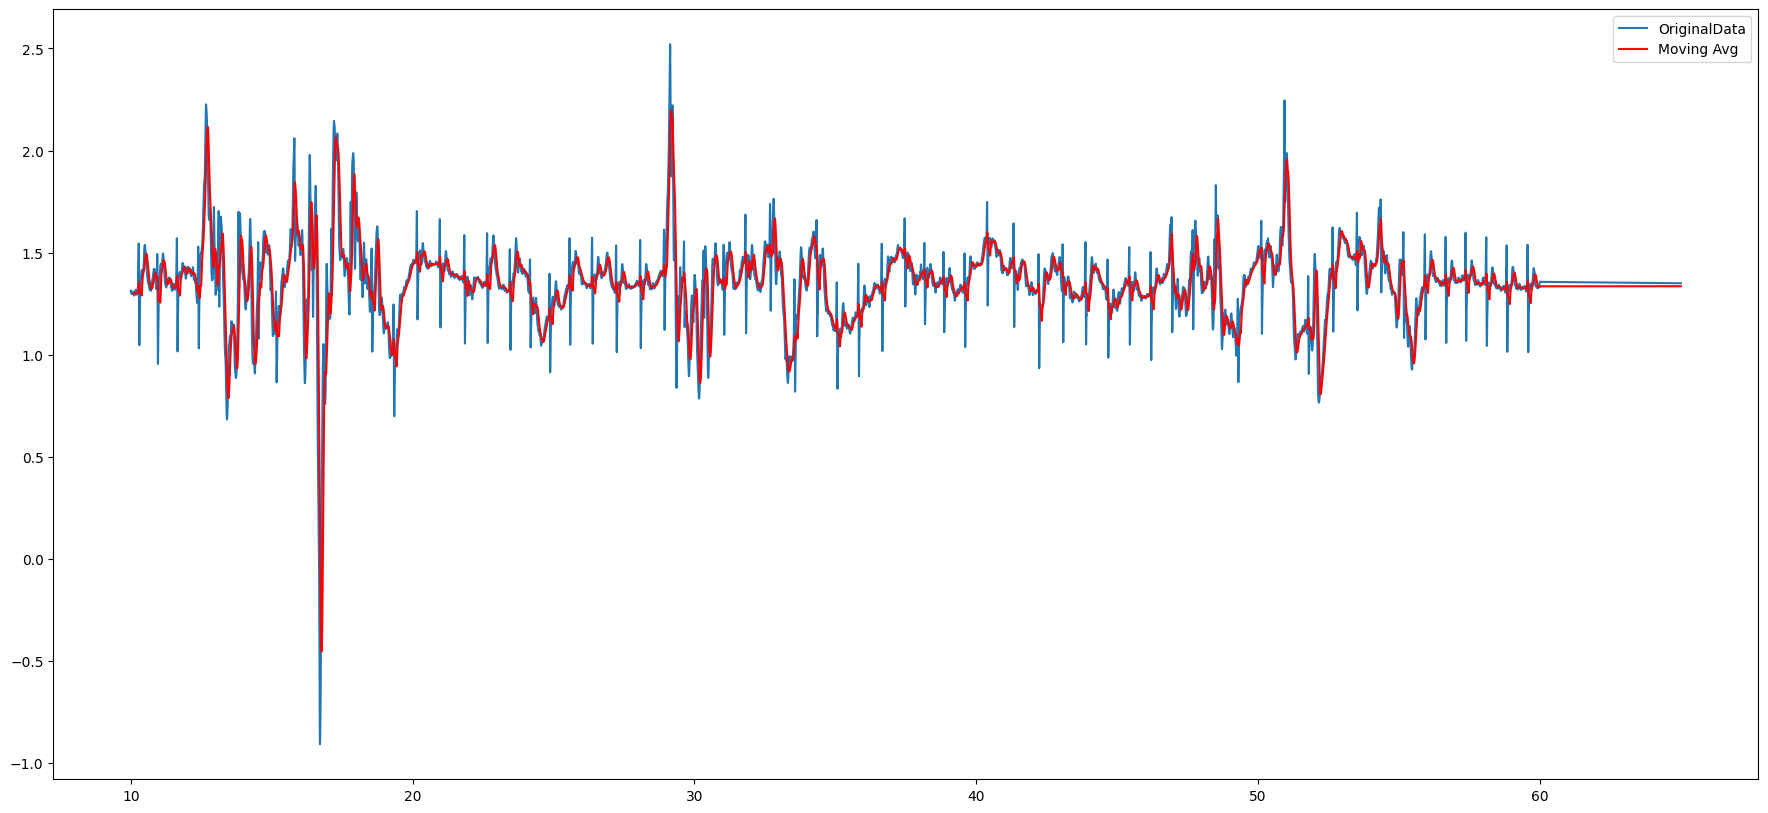

In [21]:
fig = plt.figure(figsize=(22, 10))

plt.plot(df['1'], label="OriginalData")
plt.plot(df['MA_window_1'], color='red', label="Moving Avg")
plt.legend()

C:\Users\kufuk\AppData\Local\Temp\ipykernel_21768\1656806322.py:6: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.plot(ts[window_size:], label="Реальные значения", color='black')
C:\Users\kufuk\AppData\Local\Temp\ipykernel_21768\1656806322.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window_size), color='red')


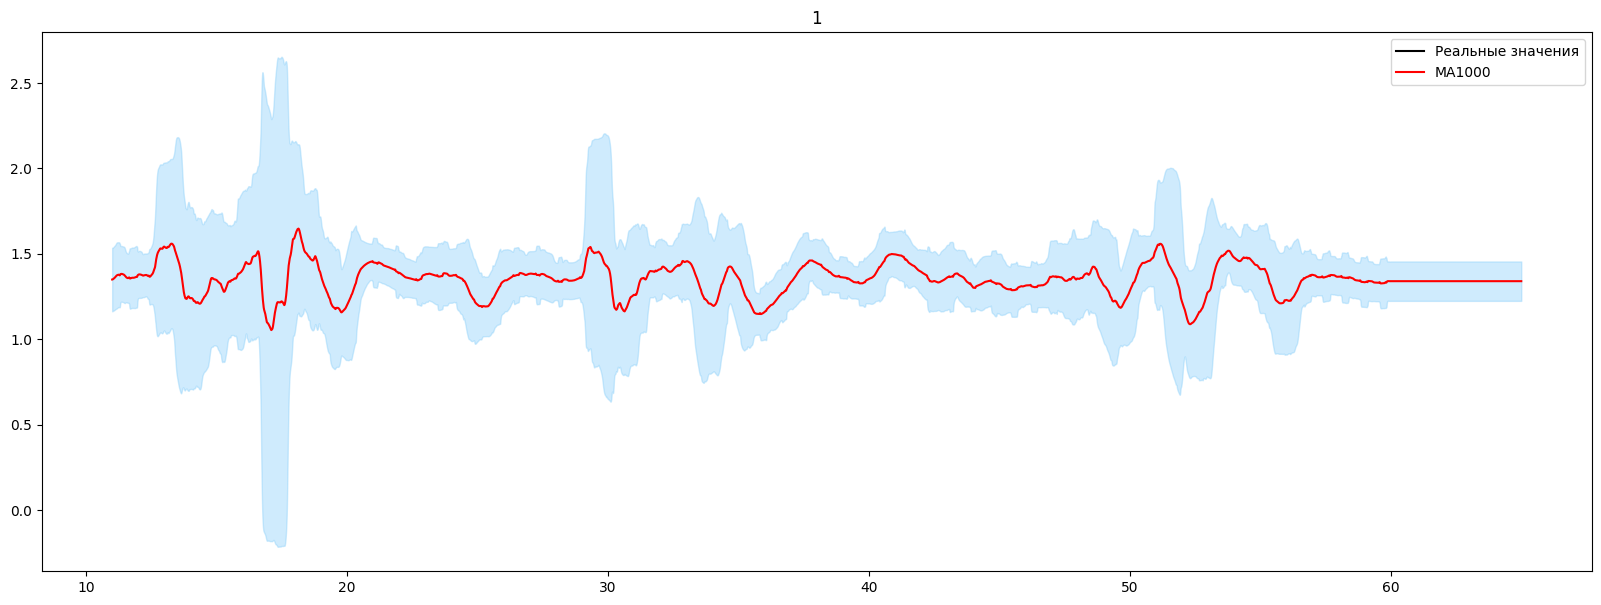

In [27]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window_size=30, figsize=(20, 7)):
    rolling_mean = ts.rolling(window=window_size).mean()
    rolling_std = ts.rolling(window=window_size).std()
    plt.figure(figsize=figsize)
    plt.title(ts.name)
    plt.plot(ts[window_size:], label="Реальные значения", color='black')
    if plot_ma:
        plt.plot(rolling_mean, 'g', label='MA'+str(window_size), color='red')
    if plot_intervals:
        lower_bound = rolling_mean - 1.96*rolling_std
        upper_bound = rolling_mean + 1.96*rolling_std
        plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound, color='lightskyblue', alpha=0.4)
    plt.legend(loc='best')
    plt.show()

plot_ts(df['1'], window_size=1000)

In [31]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['1'], order=(5, 0, 3))
arima_model_fit = arima_model.fit()

c:\VSCodeProjects\TimeSeries\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\VSCodeProjects\TimeSeries\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\VSCodeProjects\TimeSeries\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\VSCodeProjects\TimeSeries\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/17000 [00:00<?, ?it/s]

C:\Users\kufuk\AppData\Local\Temp\ipykernel_21768\1095808578.py:25: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = FuncAnimation(fig, update, interval=200)
  0%|          | 1/17000 [00:02<12:13:38,  2.59s/it]c:\VSCodeProjects\TimeSeries\.venv\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
  0%|          | 4/17000 [00:10<11:56:39,  2.53s/it]


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000019240ACF5B0> (for post_execute):


ValueError: too many values to unpack (expected 2)

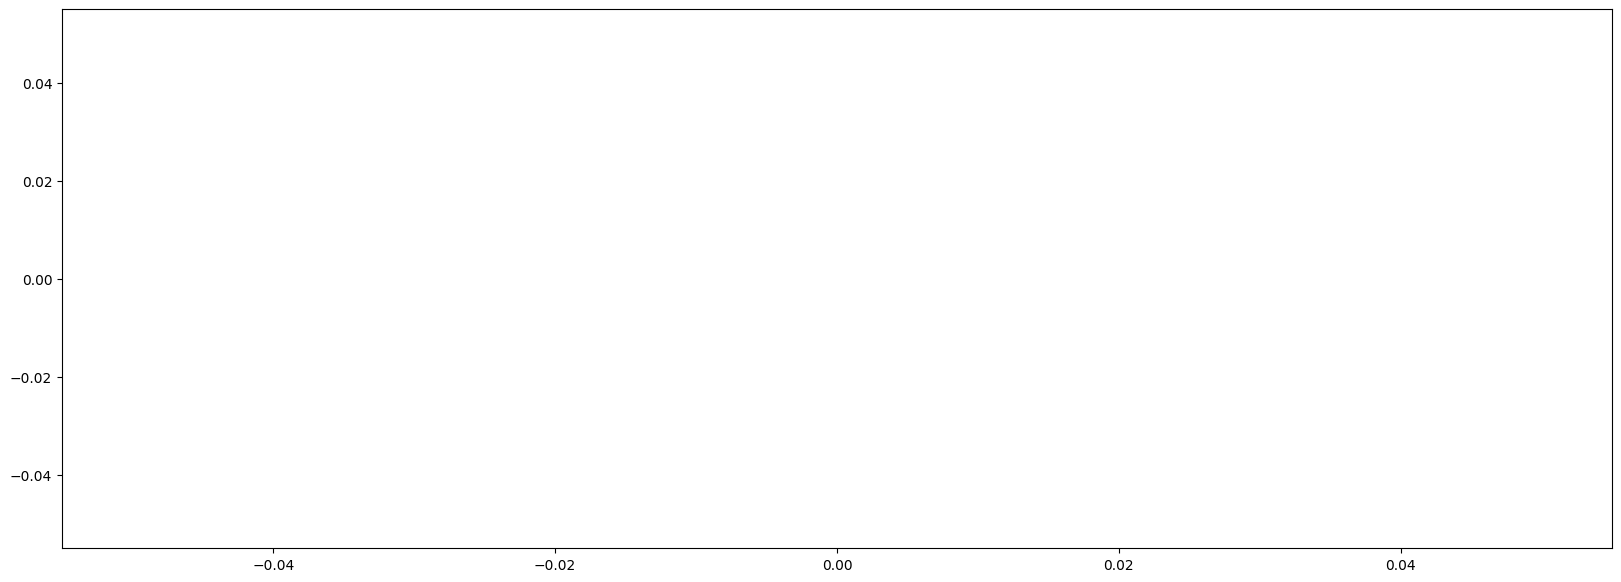

In [55]:
from tqdm import trange
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(20, 7))

x = df['1'].values
size = int(len(x) * 0.66)
train, test = x[0:size], x[size:]
history = [x for x in train]
arima_prd = []

line, = plt.plot(arima_prd)

def update(frame):
    line.set_data(arima_prd)
    fig.gca().relim()
    fig.gca().autoscale_view()
    return line,

for t in trange(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    modef_fit = model.fit()
    arima_prd.append(modef_fit.forecast()[0])
    history.append(test[t])
    animation = FuncAnimation(fig, update, interval=200)

plt.show()